In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [45]:
#Display cell output for all expressions
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
#Set max rows displayed in a cell
pd.set_option('display.max_rows', 5)
#import data
bcd = pd.read_csv("C:/Users/jjden/Dropbox/Education/IU/python course/final project/Breast-Cancer-Wisconsin.csv",skip_blank_lines=True,header=0)
#check data
bcd.dtypes
bcd.head()
print (str(bcd.Scn.count()) + " rows of data in the data sample")

Scn      int64
A2       int64
         ...  
A10      int64
CLASS    int64
Length: 11, dtype: object

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


699 rows of data in the data sample


In [46]:
#Inspect missing data
a7 = bcd.A7
len(bcd.loc[a7 == '?'])
bcd.loc[a7 == '?']

16

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
...,...,...,...,...,...,...,...,...,...,...,...
411,1238464,1,1,1,1,1,?,2,1,1,2
617,1057067,1,1,1,1,1,?,1,1,1,2


#markdown
Replace ? by NaN in column A7. Use ____.replace('?', np.NaN) - but properly specify A7 column.
After replacing - your column needs to be converted back to numeric. Apply pandas function pd.to_numeric() for column A7
Report how many NaN. Use isnull() function applied to the dataframe. Then you can use arithmetic sum(). [Remember to use print() statement to report]
Replace NaN values with the mean of column A7. Use fillna() - find how to calculate mean of the column, add a parameter skipna=TRUE. Apply this function to the entire df - you do not need to specify here column A7

In [47]:
#replace missing data('?')
bcd.A7.replace('?',np.NaN)
bcd.A7 = pd.to_numeric(bcd.A7,errors='coerce')
print("Count of isnull (NaN) in column A7: " + str(bcd.A7.isnull().sum()))

#continue data cleanup
bcd.fillna(bcd.loc[:,"A7"].mean(skipna=True), inplace=True)

0       1
1      10
       ..
697     4
698     5
Name: A7, Length: 699, dtype: object

Count of isnull (NaN) in column A7: 16


#markdown
Provide the summary statistics - you can use describe() function
Find number of columns and number of rows - hint use ___.shape[] - use a proper index for column and row (consult pandas). Report how many observations (row) and columns
Report how many unique id values (column Scn) - hint the length of unique ids

In [48]:
#examine data further
print(bcd.describe())
shape = bcd.shape
print ("Here is the shape of bcd: There are " + str(shape[0]) + " observations (rows) and " + str(shape[1]) + " columns")
bcdunique = bcd.Scn.unique()
print ("There are " + str(len(bcdunique)) + " unique id values in column Scn.")

                Scn         A2          A3          A4          A5  \
count  6.990000e+02  699.00000  699.000000  699.000000  699.000000   
mean   1.071704e+06    4.41774    3.134478    3.207439    2.806867   
...             ...        ...         ...         ...         ...   
75%    1.238298e+06    6.00000    5.000000    5.000000    4.000000   
max    1.345435e+07   10.00000   10.000000   10.000000   10.000000   

               A6          A7          A8          A9         A10       CLASS  
count  699.000000  699.000000  699.000000  699.000000  699.000000  699.000000  
mean     3.216023    3.544656    3.437768    2.866953    1.589413    2.689557  
...           ...         ...         ...         ...         ...         ...  
75%      4.000000    5.000000    5.000000    4.000000    1.000000    4.000000  
max     10.000000   10.000000   10.000000   10.000000   10.000000    4.000000  

[8 rows x 11 columns]
Here is the shape of bcd: There are 699 observations (rows) and 11 columns
T

Draw histograms for columns A2-A10. Note: you need to subset your dataframe - slice only columns A2-A10. Use histogram function, add a color of your choice. Note you need to run hist() function on your dataframe with selected columns only. It will output all 9 columns as subplots. Here do not worry about individual titles, y and x axis. You could adjust bins and alpha (opacity) on your histograms
Hint: Use this layout after calling hist(): plt.tight_layout(rect=(0, 0, 1.2, 1.2))  - to make it fit better. You can also turn grid off in histograms by adding grid=False to hist() parameters. Feel free to explore hist() parameters to enhance the look of histograms.

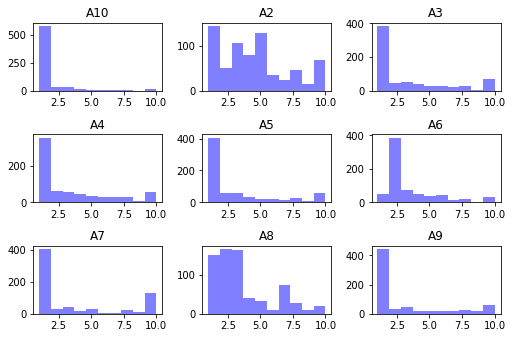

In [49]:
#draw histograms
num_bins = 10
hist = bcd.iloc[:,1:10].hist(facecolor='blue',alpha=0.5,grid=False,bins=num_bins)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

Draw a bar plot for CLASS - you can use groupby to see counts of  benign and malignant values or you can count values directly using pd.value_counts() function and apply it to plot.bar() function.

Text(0, 0.5, 'count')

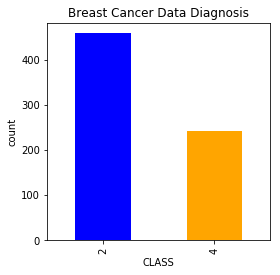

In [50]:
bar = bcd.groupby(['CLASS'])['Scn'].count().plot.bar(figsize=(4,4),color=('blue','orange'),title='Breast Cancer Data Diagnosis')
plt.ylabel('count')


Draw a scatterplot of any two columns.

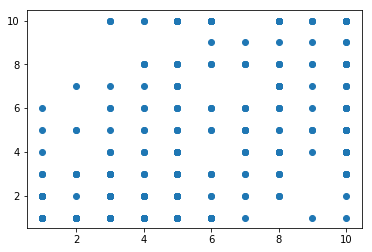

In [51]:
plt.scatter(bcd.A2,bcd.A3,marker='o')

Summarize by reporting which values might need standardization in the future (too much variation) and any other observations that you may discover as a Data Scientist.

Columns A7, A3, A9 all have standard deviation greater than 3. A standard normal distribution has sd of 1. Probably these columns at least could use standardization.

Phase 2 beginning

Use KMeans algorithm (do not use column CLASS) 10pts (use only columns A2-A10)

In [107]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
dfa2a9 = bcd[['A2','A3','A4','A5','A6','A7','A8','A9','A10']]
#print(type(dfa2a9))
#print(dfa2a9)
model.fit(dfa2a9.values)
print("Here are centroids:")
print(model.cluster_centers_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Here are centroids:
[[2.97155361 1.25820569 1.3785558  1.3107221  2.0547046  1.35128199
  2.07439825 1.21444201 1.10284464]
 [7.5        7.41935484 7.         4.32258065 5.87096774 3.55861238
  5.58064516 7.35483871 2.20967742]
 [6.7625     8.3875     8.425      7.75       6.775      9.2125
  7.375      7.7375     3.7875    ]
 [7.24       4.85       5.04       4.75       4.03       9.02544656
  5.19       3.74       1.67      ]]


Find the optimal number of clusters 10 pts
calculate inertia:
create a range from 1 to 15 or more,
create an empty list for inertias values
use for loop to calculate KMeans for each values

In [108]:
inertiaRange = range(1,16)
inertiaList = []
for x in inertiaRange:
    model = KMeans(n_clusters=x)
    model.fit(dfa2a9.values)
    inertiaList.append(model.inertia_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=11, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=13, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=14, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=15, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

plot range and inertia:
Add title, ylabel, xlabel

Text(0.5, 0, 'number of clusters')

Text(0, 0.5, 'inertia')

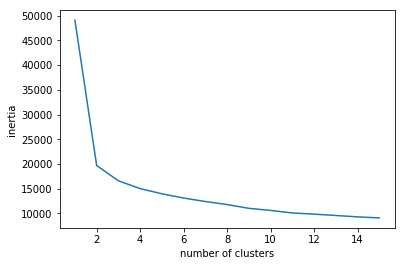

In [109]:
ax = plt.plot(inertiaRange,inertiaList)
plt.xlabel('number of clusters')
plt.ylabel('inertia')

specify the optimal number of clustes based on the inertia plot:

3 seems like the optimal number of clusters!

Revise data variation 10pts
apply standard deviation function for columns A2-A10
plot standard deviation values - select a graphic that could display all nine values [do not use histogram], add title, legend, ylabel, xlabel. Can you capture how wide or narrow is the variation in each column?
describe which features have a lot of data variation

A10    1.715078
A6     2.214300
         ...   
A9     3.053634
A7     3.601852
Length: 9, dtype: float64


Text(0.5, 0, 'data column')

Text(0, 0.5, 'standard deviation')

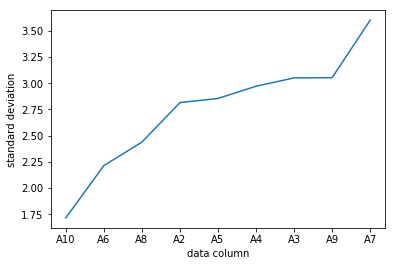

In [111]:
#dataframe.std() will run only on numeric columns, i.e. not the labels
stdev = dfa2a9.std()
stdev.sort_values(ascending=True,inplace=True)
print(stdev)
ax2 = plt.plot(stdev.index,stdev.values)
plt.xlabel('data column')
plt.ylabel('standard deviation')

Implement normalization 8pts
import make_pipeline - use sklearn.pipeline
import StandardScaler
review datacamp if needed on how to create a pipeline
use the n_cluster based on the optimal number you have identified from Inertia
find centroids and print them

In [114]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler,kmeans)
pipeline.fit(dfa2a9.values)
print("Here are centroids:")
print(kmeans.cluster_centers_)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

Here are centroids:
[[ 1.16860808  1.75960552  1.77223164  1.58294095  1.86961155  1.16430087
   1.3895322   1.56650375  3.80910288]
 [-0.51945334 -0.61728918 -0.61702732 -0.52103625 -0.53370405 -0.60430508
  -0.56576652 -0.54283279 -0.29912703]
 [ 0.94324425  1.06056115  1.0579358   0.87929444  0.86029786  1.12907601
   1.00835139  0.92952452  0.03297812]]
